| | | |
|-|:--:|-|
|![IUT](/run/media/omarf/UnknownSSD/IUT/IUT_7th_Sem/EEE_4710/github/Hands-on-Machine-Learning-with-Python/My_Assignments/iut_logo/IUT_logo.png)|$$\textbf{\Large Islamic University of Technology (IUT)}\newline\textbf{\textit{\large Organization of Islamic Cooperation (OIC)} }\newline\text{ \normalsize Department of Electrical and Electronic Engineering }$$|![OIC](/run/media/omarf/UnknownSSD/IUT/IUT_7th_Sem/EEE_4710/github/Hands-on-Machine-Learning-with-Python/My_Assignments/iut_logo/OIC_logo.png)|


| **ID**             | **200021118**                                        |
| ------------------ | ---------------------------------------------------- |
| **Name**           | **Omar Faruk**                                       |
| **Course ID**      | **EEE 4710**                                         |
| **Course Name**    | **Artificial Intelligence and Machine Learning Lab** |
| **Assignment No.** | **4** (part 01)                                               |

# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')


In [2]:
# display in tabular form
def pdisplay(df , columns = None):
    if columns:
        display(pd.DataFrame(df , columns = columns))
    else:
        display(pd.DataFrame(df))

In [3]:
# Convert categorical data to numerical with mapping 
def cat_to_num(df , object_cols , print_map=False , get_map=False):
    for idx in object_cols:
        mapping_dict =  dict(zip(df[idx].value_counts().index.values , range(0, len(df[idx].value_counts().index.values) ) ))
        if print_map:
            print(f"{idx} : {mapping_dict}")
        df[idx] = df[idx].map(mapping_dict)
        
    return df

# Import Data

## Import data directly from UCI Machine Learning Repository


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
Xdata = heart_disease.data.features 
ydata = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [5]:
pdisplay(Xdata.isnull().sum() , ["X null count"])
pdisplay(ydata.isnull().sum() , ["y null count"])

,X null count
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


,y null count
num,0


In [6]:
Xdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [7]:
ydata.head()

,num
0,0
1,2
2,1
3,0
4,0


# Analyze Data

In [8]:
pdisplay(Xdata.dtypes , ["Xdata"])

,Xdata
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [9]:
pdisplay( pd.DataFrame(ydata).dtypes , ["ydata"])

,ydata
num,int64


In [10]:
Xdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [11]:
ydata.describe()

,num
count,303.000000
mean,0.937294
std,1.228536
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,4.000000


In [12]:
pdisplay( ydata.value_counts())

,count
num,
0,164
1,55
2,36
3,35
4,13


# Identify Issues in the Dataset

- There are some Missing data which will be handled with imputation.

# Data visualization

# Removing Irrelevant Reatures

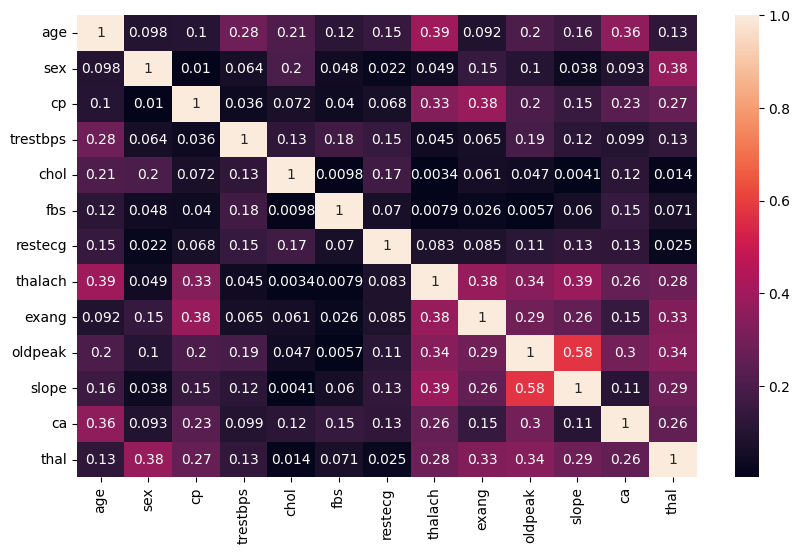

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(Xdata.corr().abs() , annot=True)
plt.show()

# Convert Categorical to Numerical

- no Categorical Data

# Train & Test Split

In [ ]:
Xtrain, Xtest , ytrain , ytest = train_test_split(Xdata , ydata , test_size = 0.2 , random_state = 118)

print(f"Xtrain : {Xtrain.shape} , \nXtest : {Xtest.shape} , \nytrain : {ytrain.shape} , \nytest : {ytest.shape}")

Xtrain : (242, 13) , 
Xtest : (61, 13) , 
ytrain : (242, 1) , 
ytest : (61, 1)


# Missing Data Handling

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

Xtrain = pd.DataFrame(imp.fit_transform(Xtrain) , columns = Xtrain.columns)

Xtrain.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,58.0,1.0,3.0,105.0,240.0,0.0,2.0,154.0,1.0,0.6,2.0,0.0,7.0
1,34.0,0.0,2.0,118.0,210.0,0.0,0.0,192.0,0.0,0.7,1.0,0.0,3.0
2,51.0,1.0,4.0,140.0,298.0,0.0,0.0,122.0,1.0,4.2,2.0,3.0,7.0
3,51.0,1.0,4.0,140.0,299.0,0.0,0.0,173.0,1.0,1.6,1.0,0.0,7.0
4,66.0,1.0,4.0,120.0,302.0,0.0,2.0,151.0,0.0,0.4,2.0,0.0,3.0


# Normalization

In [ ]:
norm = StandardScaler()

Xtrain = pd.DataFrame(norm.fit_transform(Xtrain) , columns = Xtrain.columns)

Xtrain.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,2.420000e+02,2.420000e+02,2.420000e+02,2.420000e+02,2.420000e+02,242.000000,2.420000e+02,2.420000e+02,2.420000e+02,2.420000e+02,2.420000e+02,2.420000e+02,2.420000e+02
mean,2.128692e-16,-1.064346e-16,-1.468064e-16,-6.899898e-16,-1.027644e-16,0.000000,-8.074349e-17,-4.477594e-16,-9.542413e-17,1.137749e-16,4.817083e-17,8.808381e-17,-1.211152e-16
std,1.002073e+00,1.002073e+00,1.002073e+00,1.002073e+00,1.002073e+00,1.002073,1.002073e+00,1.002073e+00,1.002073e+00,1.002073e+00,1.002073e+00,1.002073e+00,1.002073e+00
min,-2.829176e+00,-1.477907e+00,-2.209791e+00,-2.127864e+00,-2.340298e+00,-0.411196,-9.918389e-01,-3.312030e+00,-7.027284e-01,-8.722081e-01,-9.789088e-01,-7.552234e-01,-8.667765e-01
25%,-7.454742e-01,-1.477907e+00,-1.179407e+00,-6.759044e-01,-6.784213e-01,-0.411196,-9.918389e-01,-7.338721e-01,-7.027284e-01,-8.722081e-01,-9.789088e-01,-7.552234e-01,-8.667765e-01
50%,1.318742e-01,6.766323e-01,-1.490225e-01,-1.174583e-01,-8.903481e-02,-0.411196,-4.875847e-01,1.325581e-01,-7.027284e-01,-3.830439e-01,6.003974e-01,-7.552234e-01,-8.667765e-01
75%,7.898854e-01,6.766323e-01,8.813619e-01,4.409878e-01,5.341689e-01,-0.411196,1.025178e+00,7.031340e-01,1.423025e+00,5.545209e-01,6.003974e-01,3.146764e-01,1.216946e+00
max,2.434913e+00,6.766323e-01,8.813619e-01,3.791664e+00,6.123679e+00,2.431930,1.025178e+00,2.224670e+00,1.423025e+00,4.182489e+00,2.179703e+00,2.454476e+00,1.216946e+00


# Models

In [ ]:
# # Regression Models
# from sklearn.svm import SVR
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor

# Classification Models
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


# Machine Learning Pipelines
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [ ]:
svc = SVC()
dtr = DecisionTreeClassifier()
knnr = KNeighborsClassifier()
xgb = XGBClassifier()

In [ ]:
pipe_svc = Pipeline([ ('imp' , imp) , ('scaler', norm), ('svc', svc)])

pipe_dtr = Pipeline([ ('imp' , imp) , ('scaler', norm), ('dtr', dtr)])

pipe_knnr = Pipeline([ ('imp' , imp) , ('scaler', norm), ('knnr', knnr)])

pipe_xgb = Pipeline([ ('imp' , imp) , ('scaler', norm), ('xgb', xgb)])

In [ ]:
models = [pipe_svc , pipe_dtr , pipe_knnr , pipe_xgb]

In [ ]:
for model in models:
    model.fit(Xtrain , ytrain)
    print(f"# Model : {models.index(model)} ===>")
    # score = mean_squared_error(ytest , model.predict(Xtest))
    # print(f"Model : {model} , \nAccuracy : {score}")
    # pdisplay(pd.DataFrame(classification_report(ytest , model.predict(Xtest))))
    print(f"Model : {model} , \nAccuracy : {MAPE(ytest , model.predict(Xtest))}")
    print("-------------------------------------------------\n")



# Model : 0 ===>
Model : Pipeline(steps=[('imp', SimpleImputer()), ('scaler', StandardScaler()),
                ('svc', SVC())]) , 
Accuracy : 0.47540983606557374
-------------------------------------------------

# Model : 1 ===>
Model : Pipeline(steps=[('imp', SimpleImputer()), ('scaler', StandardScaler()),
                ('dtr', DecisionTreeClassifier())]) , 
Accuracy : 2584032573081432.0
-------------------------------------------------

# Model : 2 ===>
Model : Pipeline(steps=[('imp', SimpleImputer()), ('scaler', StandardScaler()),
                ('knnr', KNeighborsClassifier())]) , 
Accuracy : 0.47540983606557374
-------------------------------------------------

# Model : 3 ===>
Model : Pipeline(steps=[('imp', SimpleImputer()), ('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_b